# <p style='text-align: center;'> Competencia - Titanic Dataset </p>
Esta es la competencia legendaria Titanic ML: el mejor, el primer desafío para que se familiaricen en ML...

La competencia es simple: use el aprendizaje automático para crear un modelo que prediga qué pasajeros sobrevivieron al naufragio del Titanic.

![img](https://e00-elmundo.uecdn.es/assets/multimedia/imagenes/2019/01/02/15464320849700.jpg)

### El reto

El hundimiento del Titanic es uno de los naufragios más infames de la historia.

*El 15 de abril de 1912, durante su viaje inaugural, el RMS Titanic, ampliamente considerado "insumergible", se hundió después de chocar con un iceberg. Desafortunadamente, no había suficientes botes salvavidas para todos a bordo, lo que resultó en la muerte de 1502 de los 2224 pasajeros y la tripulación*.

Si bien hubo algún elemento de suerte involucrado en sobrevivir, parece que algunos grupos de personas tenían más probabilidades de sobrevivir que otros.

En este desafío, crea un modelo predictivo que responda a la pregunta: "¿Qué tipo de personas tenían más probabilidades de sobrevivir?" utilizando datos de pasajeros (es decir, nombre, edad, sexo, clase socioeconómica, etc.).

### Workflow stages

El flujo de trabajo puede abordar siete objetivos principales:

* Clasificación. Es posible que queramos clasificar o categorizar nuestras muestras. También es posible que deseemos comprender las implicaciones o la correlación de diferentes clases con nuestro objetivo de solución.

* Correlación. Se puede abordar el problema en función de las características disponibles dentro del conjunto de datos de entrenamiento. ¿Qué características dentro del conjunto de datos contribuyen significativamente a nuestro objetivo de solución? Hablando estadísticamente, ¿existe una correlación entre una característica y el objetivo de la solución? A medida que cambian los valores de las funciones, ¿cambia también el estado de la solución y viceversa? Esto se puede probar tanto para características numéricas como categóricas en el conjunto de datos dado.

* Convirtiendo. Para la etapa de modelado, es necesario preparar los datos. Dependiendo de la elección del modelo, se puede requerir que todas las características se conviertan a valores numéricos equivalentes. Entonces, por ejemplo, convertir valores categóricos de texto en valores numéricos.

* Completando. La preparación de datos también puede requerir que estimemos los valores faltantes dentro de una característica. Los algoritmos pueden funcionar mejor cuando no faltan valores.

* Corrección. También podemos analizar el conjunto de datos de entrenamiento dado en busca de errores o posiblemente valores inexactos dentro de las características e intentar correngir estos valores o excluir las muestras que contienen los errores. Una forma de hacer esto es detectar cualquier valor atípico entre nuestras muestras o características. También podemos descartar por completo una característica si no contribuye al análisis o puede sesgar significativamente los resultados.

* Creando. ¿Podemos crear nuevas características basadas en una característica existente o un conjunto de características, de modo que la nueva característica siga los objetivos de correlación, conversión e integridad?

* Gráficos. Cómo seleccionar los gráficos y diagramas de visualización correctos según la naturaleza de los datos y los objetivos de la solución.



In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

### Adquisición de datos

Los paquetes de Python Pandas nos ayudan a trabajar con nuestros conjuntos de datos. Comenzamos adquiriendo los conjuntos de datos de entrenamiento y prueba en dataframes.

In [3]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
combine = [train_df, test_df]

### Analizar describiendo los datos

Pandas también ayuda a describir los conjuntos de datos que responden a las siguientes preguntas al principio de nuestro proyecto.

* ¿Qué características están disponibles en el conjunto de datos?
* ¿Qué variables son categóricas?
* ¿Hay variables numéricas?
* ¿Qué variables tienen tipos de datos mezclados? (numérico, alfanumérico, etc...)

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

### ¿Cuál es la distribución de las variables numéricas en las muestras?

Esto nos ayuda a determinar, entre otras ideas iniciales, qué tan representativo es el conjunto de datos de entrenamiento del dominio del problema real.

   * Las muestras totales son 891 o el 40% del número real de pasajeros a bordo del Titanic (2224).
   * Survived es una variable categórica con valores 0 o 1.
   * La mayoría de los pasajeros (> 75%) no viajaron con padres o hijos.
   * Casi el 30% de los pasajeros tenían hermanos y / o cónyuge a bordo.
   * Las tarifas variaron significativamente y pocos pasajeros (<1%) pagaron hasta $ 512.
   * Pocos pasajeros de edad avanzada (<1%) con edades comprendidas entre los 65 y los 80 años.



In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


¿Cuál es la distribución de variables categóricas?

   * Los nombres son únicos en todo el conjunto de datos (único = 891)
   * Variable sexo como dos valores posibles, donde el 65% son hombres (frecuencia = 577 / recuento = 891).
   * Los valores de cabina tienen varios duplicados en las muestras. Alternativamente, varios pasajeros compartieron una.
   * Embarked toma tres valores posibles. Puerto S utilizado por la mayoría de los pasajeros
   * La función de ticket tiene una alta proporción (22%) de valores duplicados (único = 681).

In [9]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Foreman, Mr. Benjamin Laventall",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


### Supuestos basados en análisis de datos

Llegamos a los siguientes supuestos basados en el análisis de datos realizado hasta ahora. Podemos validar estas suposiciones antes de tomar las medidas adecuadas.

#### Correlación.

Queremos saber qué tan bien se correlaciona cada característica con Survival. Queremos hacer esto al principio de nuestro proyecto y hacer coincidir estas correlaciones rápidas con correlaciones modeladas más adelante en el proyecto.

#### Completando.

    Es posible que deseemos completar la variable Edad, ya que definitivamente está correlacionada con la supervivencia.
    Es posible que deseemos completar la variable Embarcado, ya que también puede correlacionarse con la supervivencia u otra función importante.

#### Corrección.

    La variable Ticket puede eliminarse de nuestro análisis ya que contiene una alta proporción de duplicados (22%) y es posible que no haya una correlación entre Ticket y supervivencia.
    La variable de cabina puede descartarse porque está muy incompleta o contiene muchos valores nulos tanto en el conjunto de datos de entrenamiento como de prueba.
    PassengerId puede eliminarse del conjunto de datos de entrenamiento ya que no contribuye a la supervivencia.
    La variable del nombre es relativamente no estándar, puede que no contribuya directamente a la supervivencia, por lo que tal vez se elimine.

#### Creación de columnas?.

    Es posible que deseemos crear una nueva variable llamada Familia basada en Parch y SibSp para obtener el recuento total de miembros de la familia a bordo.
    Es posible que deseemos manipular la variable Nombre para extraer Título como una variable nueva.
    Es posible que deseemos crear una nueva variable para los intervalos de edad. Esto convierte una característica numérica continua en una característica categórica ordinal.
    También es posible que deseemos crear una variable de rango de tarifa si ayuda a nuestro análisis.

#### Clasificando.

También podemos agregar a nuestras suposiciones lo siguiente:

    Las mujeres (sexo = mujer) tenían más probabilidades de haber sobrevivido.
    Los niños (edad <?) Tenían más probabilidades de haber sobrevivido.
    Los pasajeros de clase alta (Pclass = 1) tenían más probabilidades de haber sobrevivido.

---

### Analizar mediante pivoteo de variables

Para confirmar algunas de nuestras observaciones y suposiciones, podemos analizar rápidamente nuestras correlaciones de variables haciendo un pivoteo.

Procuremos hacerlo siempre para las variables que no tienen valores vacíos. También tiene sentido hacerlo solo para variable que son de tipo categórico (Sexo), ordinal (Pclass) o discreto (SibSp, Parch).

In [10]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [11]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [12]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [13]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


### Análisis de datos visual

Ahora podemos continuar confirmando algunas de nuestras suposiciones utilizando visualizaciones para analizar los datos.


#### Correlacionar características numéricas

Comencemos por comprender las correlaciones entre las variables numéricas y nuestro objetivo de solución (survived).

Un histograma es útil para analizar variables numéricas continuas como Edad, donde las bandas o rangos ayudarán a identificar patrones útiles. El histograma puede indicar la distribución de muestras utilizando contenedores definidos automáticamente o bandas de igual rango. Esto nos ayuda a responder preguntas relacionadas con bandas específicas (¿Tuvieron los bebés una mejor tasa de supervivencia?)

Tenga en cuenta que el eje x de los historgramas representa el recuento de muestras o pasajeros.

**Observaciones.**

   * Los bebés (edad <= 4) tuvieron una alta tasa de supervivencia.
   * Los pasajeros más viejos (edad = 80) sobrevivieron.
   * Un gran número de jóvenes de 15 a 25 años no sobrevivió.
   * La mayoría de los pasajeros tienen entre 15 y 35 años.

**Decisiones.**

Este simple análisis confirma nuestras suposiciones como decisiones para las etapas posteriores del flujo de trabajo.

   * Deberíamos considerar la edad en nuestro modelo de entrenamiento.
   * Completar la variable Edad para valores nulos.
   * Deberíamos agrupar los grupos de edad.

C:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


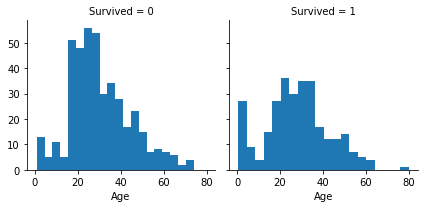

In [14]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

#### Correlacionar características numéricas y ordinales

Podemos combinar múltiples variables para identificar correlaciones usando un solo gráfico. Esto se puede hacer con variables numéricas y categóricas que tienen valores numéricos.

**Observaciones.**

   * Pclass = 3 tenía la mayoría de los pasajeros, sin embargo, la mayoría no sobrevivió.
   * Los pasajeros bebés de Pclass = 2 y Pclass = 3 sobrevivieron en su mayoría. 
   * La mayoría de los pasajeros de Pclass = 1 sobrevivieron.
   * Pclass varía en términos de distribución por edad de los pasajeros.

**Decisiones.**

   * Considere Pclass para el entrenamiento de modelos.

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


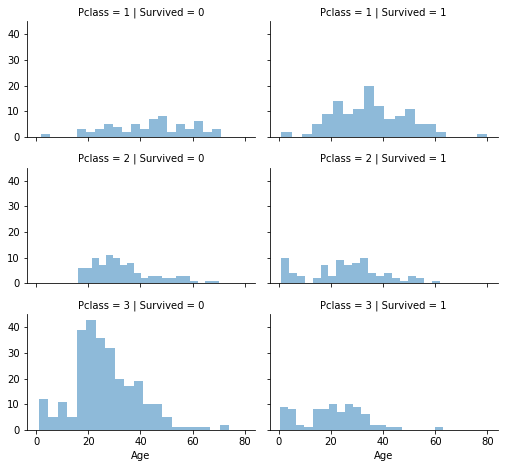

In [15]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

#### Correlacionar características categóricas

Ahora podemos correlacionar variables categóricas con nuestro objetivo de solución.

**Observaciones.**

   * Las pasajeras tenían una tasa de supervivencia mucho mejor que los hombres. 
   * Excepción en Embarked = C donde los hombres tuvieron una mayor tasa de supervivencia. Esto podría ser una correlación entre Pclass y Embarked y, a su vez, Pclass y Survived, no necesariamente una correlación directa entre Embarked y Survived.
   * Los puertos de embarque tienen diferentes tasas de supervivencia para Pclass = 3 y entre pasajeros masculinos.

**Decisiones.**

   * Agregue la variable Sexo al entrenamiento de modelos.
   * Complete y agregue la función Embarked al entrenamiento de modelos.

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:650: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


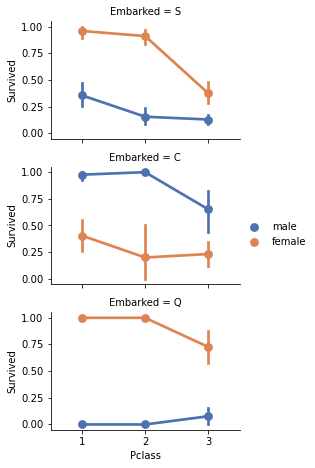

In [16]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

También es posible que deseemos correlacionar variables categóricas (con valores no numéricos) y variables numéricas. Podemos considerar correlacionar Embarcado (categórico no numérico), Sexo (categórico no numérico), Tarifa (numérico continuo), con survived (categórico numérico).

**Observaciones.**

   * Los pasajeros que pagan tarifas más altas tienen una mejor probabilidad de sobrevivir.
   * El puerto de embarque se correlaciona con las tasas de supervivencia.

**Decisiones.**

   * Considere la posibilidad de agregar intervalos a la variable de tarifa.

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


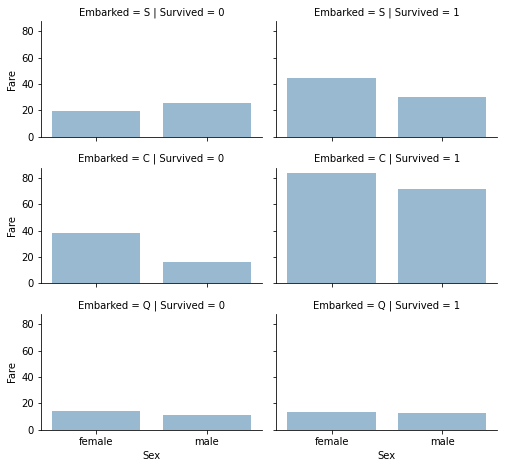

In [17]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

Hemos recopilado varias suposiciones y decisiones con respecto a nuestros conjuntos de datos y requisitos de solución. Hasta ahora no tuvimos que cambiar una sola variable o valor para llegar a estos. Ejecutemos ahora nuestras decisiones y suposiciones para corregir, crear y completar metas.

**Corregir eliminando variables**

Al eliminar variables, estamos tratando con menos puntos de datos. Acelera y facilita el análisis.

Basándonos en nuestras suposiciones y decisiones, queremos eliminar las características de Cabina y Ticket.

Tengamos en cuenta que, cuando corresponda, realizamos operaciones en conjuntos de datos de prueba y entrenamiento juntos para mantener la coherencia.

In [37]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

print("After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before (891, 9) (418, 9) (891, 9) (418, 9)


KeyError: "['Ticket' 'Cabin'] not found in axis"

#### Creando nueva variable de las existentes

Queremos analizar si la variable Nombre podemos extraer títulos y probar la correlación entre títulos y supervivencia, antes de eliminar las variables Nombre y PassengerId.

En el siguiente código, extraemos la característica de Título usando expresiones regulares. El patrón RegEx (\ w + \.) Coincide con la primera palabra que termina con un carácter de punto dentro de la función Nombre. El indicador expand = False devuelve un DataFrame.

**Observaciones.**

Cuando ploteamos el título, la edad y los sobrevivientes, observamos las siguientes observaciones.

   * La mayoría de los títulos clasifican los grupos de edad con precisión. 
   * La supervivencia entre los intervalos de Título y Edad varía ligeramente.

**Decisión.**

    Decidimos conservar la nueva variable de título para el entrenamiento de modelos.

In [22]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


Podemos cambiar titulos extraños a uno estandar

In [23]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


Podemos convertir estos títulos a categorías

In [24]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


Ahora podemos eliminar de forma segura la variable Nombre de los conjuntos de datos de entrenamiento y prueba. Tampoco necesitamos la función PassengerId en el conjunto de datos de entrenamiento.

In [25]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

### Conversión de una variable categórica

Ahora podemos convertir variables que contienen cadenas en valores numéricos. Esto es requerido por la mayoría de los modelos. 

Comencemos por convertir la variable Sexo en una nueva variable llamada Género, donde mujer = 1 y hombre = 0.

In [26]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


Podemos considerar tres métodos para completar una característica continua numérica.

   * Una forma sencilla es generar números aleatorios entre la media y la desviación estándar.

   * Una forma más precisa de adivinar los valores perdidos es utilizar otras variables correlacionadas. En nuestro caso notamos correlación entre Edad, Sexo y Clase P. Podríamos suponer los valores de Edad utilizando valores medianos para Edad en conjuntos de combinaciones de las variables Pclass y Sexo. Entonces, la edad media para Pclass = 1 y Gender = 0, Pclass = 1 y Gender = 1, y así sucesivamente ...

   * Combine los métodos 1 y 2. Entonces, en lugar de adivinar valores de edad basados en la mediana, use números aleatorios entre la media y la desviación estándar, basados en conjuntos de combinaciones de Pclass y Gender.

Los métodos 1 y 3 introducirán ruido aleatorio en nuestros modelos. Los resultados de varias ejecuciones pueden variar. Preferiríamos el método 2.

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


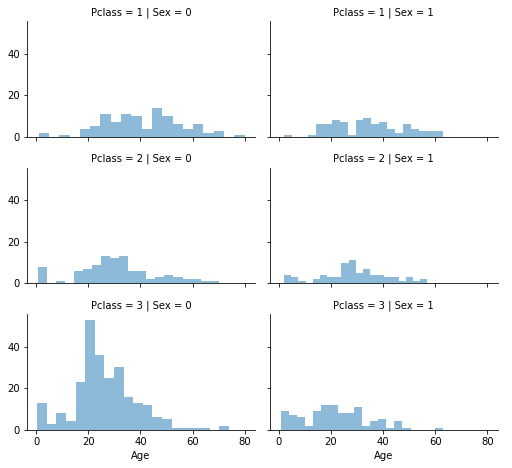

In [27]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [28]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

Ahora iteramos sobre Sexo (0 o 1) y Pclass (1, 2, 3) para calcular los valores de Edad para las seis combinaciones.

In [29]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


Creemos intervalos de edad y determinemos las correlaciones con Sobrevividos.

In [30]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


Reemplacemos Edad con ordinales basados en estos intervalos.



In [31]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


Ahora podemos descartar la variable AgeBand

In [32]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


#### Crear nueva variable combinando variables existentes

Podemos crear una nueva variable para FamilySize que combine Parch y SibSp. Esto nos permitirá eliminar Parch y SibSp de nuestros conjuntos de datos.



In [33]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


Podemos crear otra variable llamada "Is Alone"

In [34]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


Ahora descartemos las variables que no usaremos

In [35]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


También podemos crear una variable "artificial" combinando Pclass y Age.



In [36]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


#### Completando una variable categórica

La variable embarque toma valores S, Q, C según el puerto. Nuestro conjunto de datos de entrenamiento tiene dos valores faltantes. Simplemente los llenamos con la ocurrencia más común.

In [40]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [41]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


#### Conversión de variables categóricas en numéricas

Ahora podemos convertir la variable Embarked creando una nueva variable numérica.

In [42]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


#### Completar y convertir rápidamente una variable numérica

Ahora podemos completar la variable Tarifa para el valor faltante único en el conjunto de datos de prueba, usando el valor que ocurre con mayor frecuencia. Hacemos esto en una sola línea de código.

In [43]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


De igual manera, podríamos crear un intervalo para la siguiente variable

In [44]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


Y convertirlo a valores ordinales

In [45]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [46]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


### Modelar, predecir y resolver

Ahora estamos listos para entrenar un modelo y predecir la solución requerida. Hay muchos algoritmos de modelado predictivo para elegir. 

Debemos comprender el tipo de problema y el requisito de solución para limitarnos a unos pocos modelos seleccionados que podamos evaluar. 

Nuestro problema es un problema de clasificación y regresión. Queremos identificar la relación entre la salida (sobrevivido o no) con otras variables o características (género, edad, puerto ...). 

In [47]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

### <font color="red">Regresión logística</font>

Es un modelo útil para ejecutar al principio del flujo de trabajo. La regresión logística mide la relación entre la variable dependiente categórica (característica) y una o más variables independientes (características) mediante la estimación de probabilidades utilizando una función logística, que es la distribución logística acumulativa.

In [48]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.36

Podemos utilizar la regresión logística para validar nuestras suposiciones y decisiones para crear funciones y completar objetivos. Esto se puede hacer calculando el coeficiente de las variables en la función de decisión.

Los coeficientes positivos aumentan las probabilidades logarítmicas de la respuesta (y por lo tanto aumentan la probabilidad) y los coeficientes negativos disminuyen las probabilidades logarítmicas de la respuesta (y por lo tanto disminuyen la probabilidad).

  * El sexo es el coeficiente positivo más alto, lo que implica que a medida que aumenta el valor de Sexo (hombre: 0 a mujer: 1), la probabilidad de Sobrevivir = 1 es la que más aumenta.
  * A la inversa, a medida que aumenta Pclass, la probabilidad de Sobrevivido = 1 es la que más disminuye.
  * De esta manera, la Edad * Clase es una buena característica artificial para modelar, ya que tiene la segunda correlación negativa más alta con Sobrevivido.
  * Por tanto, el título es la segunda correlación positiva más alta.



In [49]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.201619
5,Title,0.397888
2,Age,0.287011
4,Embarked,0.261473
6,IsAlone,0.126553
3,Fare,-0.086655
7,Age*Class,-0.311069
0,Pclass,-0.750700


### <font color="red">SVM</font>

Dado un conjunto de muestras de entrenamiento, cada una marcada como perteneciente a una u otra de dos categorías, un algoritmo SVM crea un modelo que asigna nuevas muestras de prueba a una categoría u otra, convirtiéndolo en un clasificador lineal binario no probabilístico.

In [51]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

78.23

### <font color="red">KNN</font>

En el reconocimiento de patrones, el algoritmo k-Vecinos más cercanos (o k-NN para abreviar) es un método no paramétrico utilizado para clasificación y regresión. Una muestra se clasifica por mayoría de votos de sus vecinos, y la muestra se asigna a la clase más común entre sus k vecinos más cercanos (k es un número entero positivo, típicamente pequeño). Si k = 1, entonces el objeto simplemente se asigna a la clase de ese único vecino más cercano.

In [52]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.74

### <font color="red">Naive Bayes</font>

Son una familia de clasificadores probabilísticos simples basados en la aplicación del teorema de Bayes con fuertes (ingenuas) suposiciones de independencia entre las características. Los clasificadores Naive Bayes son altamente escalables.

In [53]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

72.28

### <font color="red">Perceptrón</font>

El perceptrón es un algoritmo para el aprendizaje supervisado de clasificadores binarios (funciones que pueden decidir si una entrada, representada por un vector de números, pertenece a alguna clase específica o no). Es un tipo de clasificador lineal, es decir, un algoritmo de clasificación que hace sus predicciones basándose en una función de predicción lineal que combina un conjunto de pesos con el vector de características.

In [54]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

78.34

### <font color="red">DT</font>

Modelo predictivo que mapea características (ramas de árboles) a conclusiones sobre el valor objetivo (hojas de árboles). Los modelos de árbol en los que la variable de destino puede tomar un conjunto finito de valores se denominan árboles de clasificación; en estas estructuras de árbol, las hojas representan etiquetas de clase y las ramas representan conjunciones de características que conducen a esas etiquetas de clase.

In [57]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.76

### <font color="red">RF</font>

Los bosques aleatorios o los bosques de decisión aleatoria son un método de aprendizaje por conjuntos (modelos de ensamble) para la clasificación, regresión y otras tareas, que operan mediante la construcción de una multitud de árboles de decisión (n_estimators = 100) en el momento del entrenamiento y dando salida a la clase que es el modo de las clases (clasificación) o predicción media (regresión) de los árboles individuales.

In [58]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.76

### Otros modelos

In [55]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


79.01

In [56]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

75.53

### Evaluación del modelo

Ahora podemos clasificar nuestra evaluación de todos los modelos para elegir el mejor para nuestro problema. Si bien tanto el árbol de decisiones como el bosque aleatorio obtienen la misma puntuación, elegimos usar el bosque aleatorio, ya que corrigen el hábito de los árboles de decisión de adaptarse en exceso a su conjunto de entrenamiento.

In [59]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.76
8,Decision Tree,86.76
1,KNN,84.74
2,Logistic Regression,80.36
7,Linear SVC,79.01
5,Perceptron,78.34
0,Support Vector Machines,78.23
6,Stochastic Gradient Decent,75.53
4,Naive Bayes,72.28
